In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### **Load a Time-Series Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
df=pd.read_csv("2) Stock Prices Data Set.csv")

Saving 2) Stock Prices Data Set.csv to 2) Stock Prices Data Set (1).csv


In [14]:
df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391


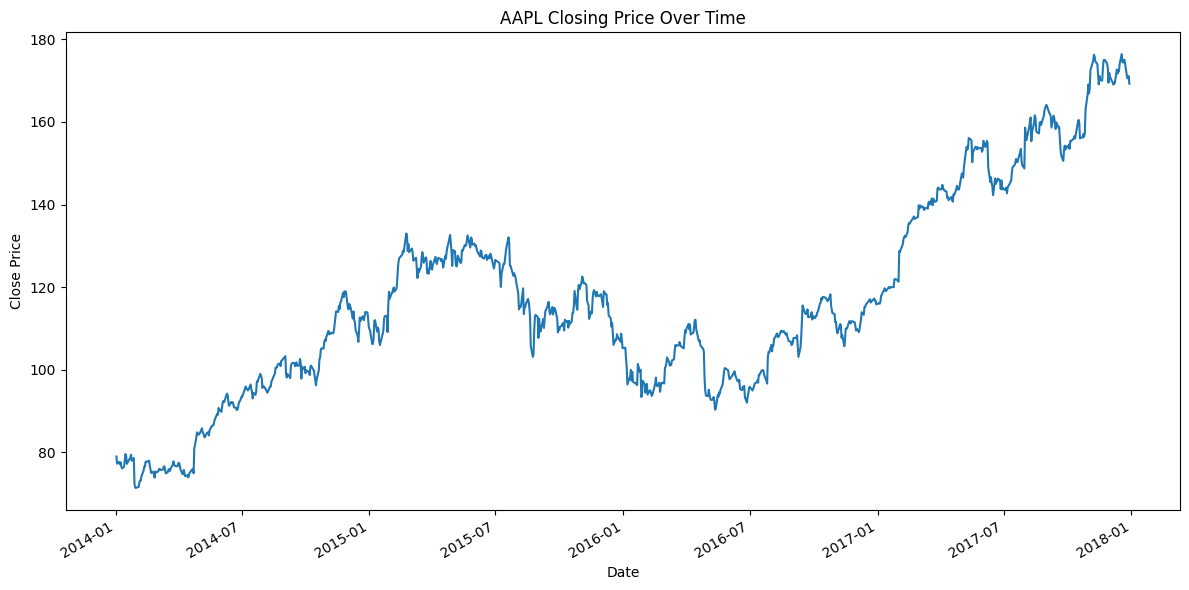

In [23]:
aapl=df[df['symbol']=='AAPL']
aapl['close'].plot(figsize=(12,6), title='AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

### **Decompose Time Series**

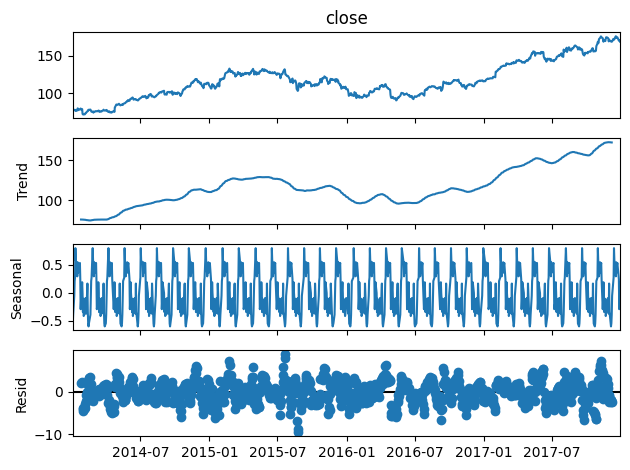

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
aapl.index = pd.to_datetime(aapl.index)
result = seasonal_decompose(aapl['close'], model='additive', period=30)
result.plot()
plt.tight_layout()
plt.show()

### **Moving Average Smoothing**

/tmp/ipython-input-26-3012888825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['SMA_30'] = aapl['close'].rolling(window=30).mean()


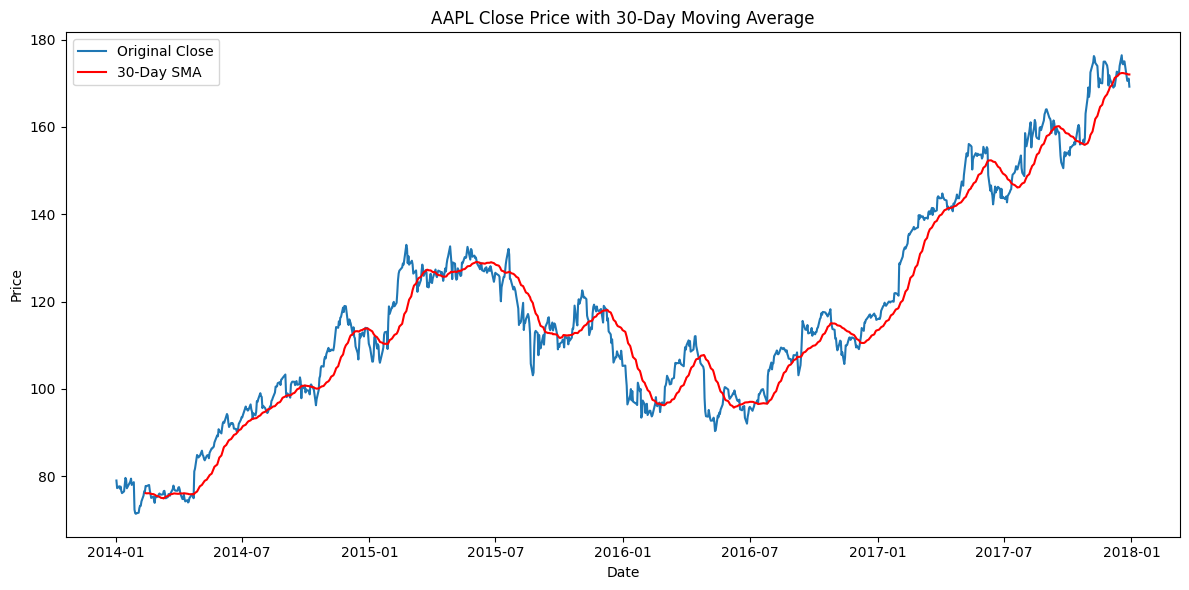

In [26]:
aapl['SMA_30'] = aapl['close'].rolling(window=30).mean()
plt.figure(figsize=(12,6))
plt.plot(aapl['close'], label='Original Close')
plt.plot(aapl['SMA_30'], label='30-Day SMA', color='red')
plt.title('AAPL Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
